In [193]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## QUESTION 1

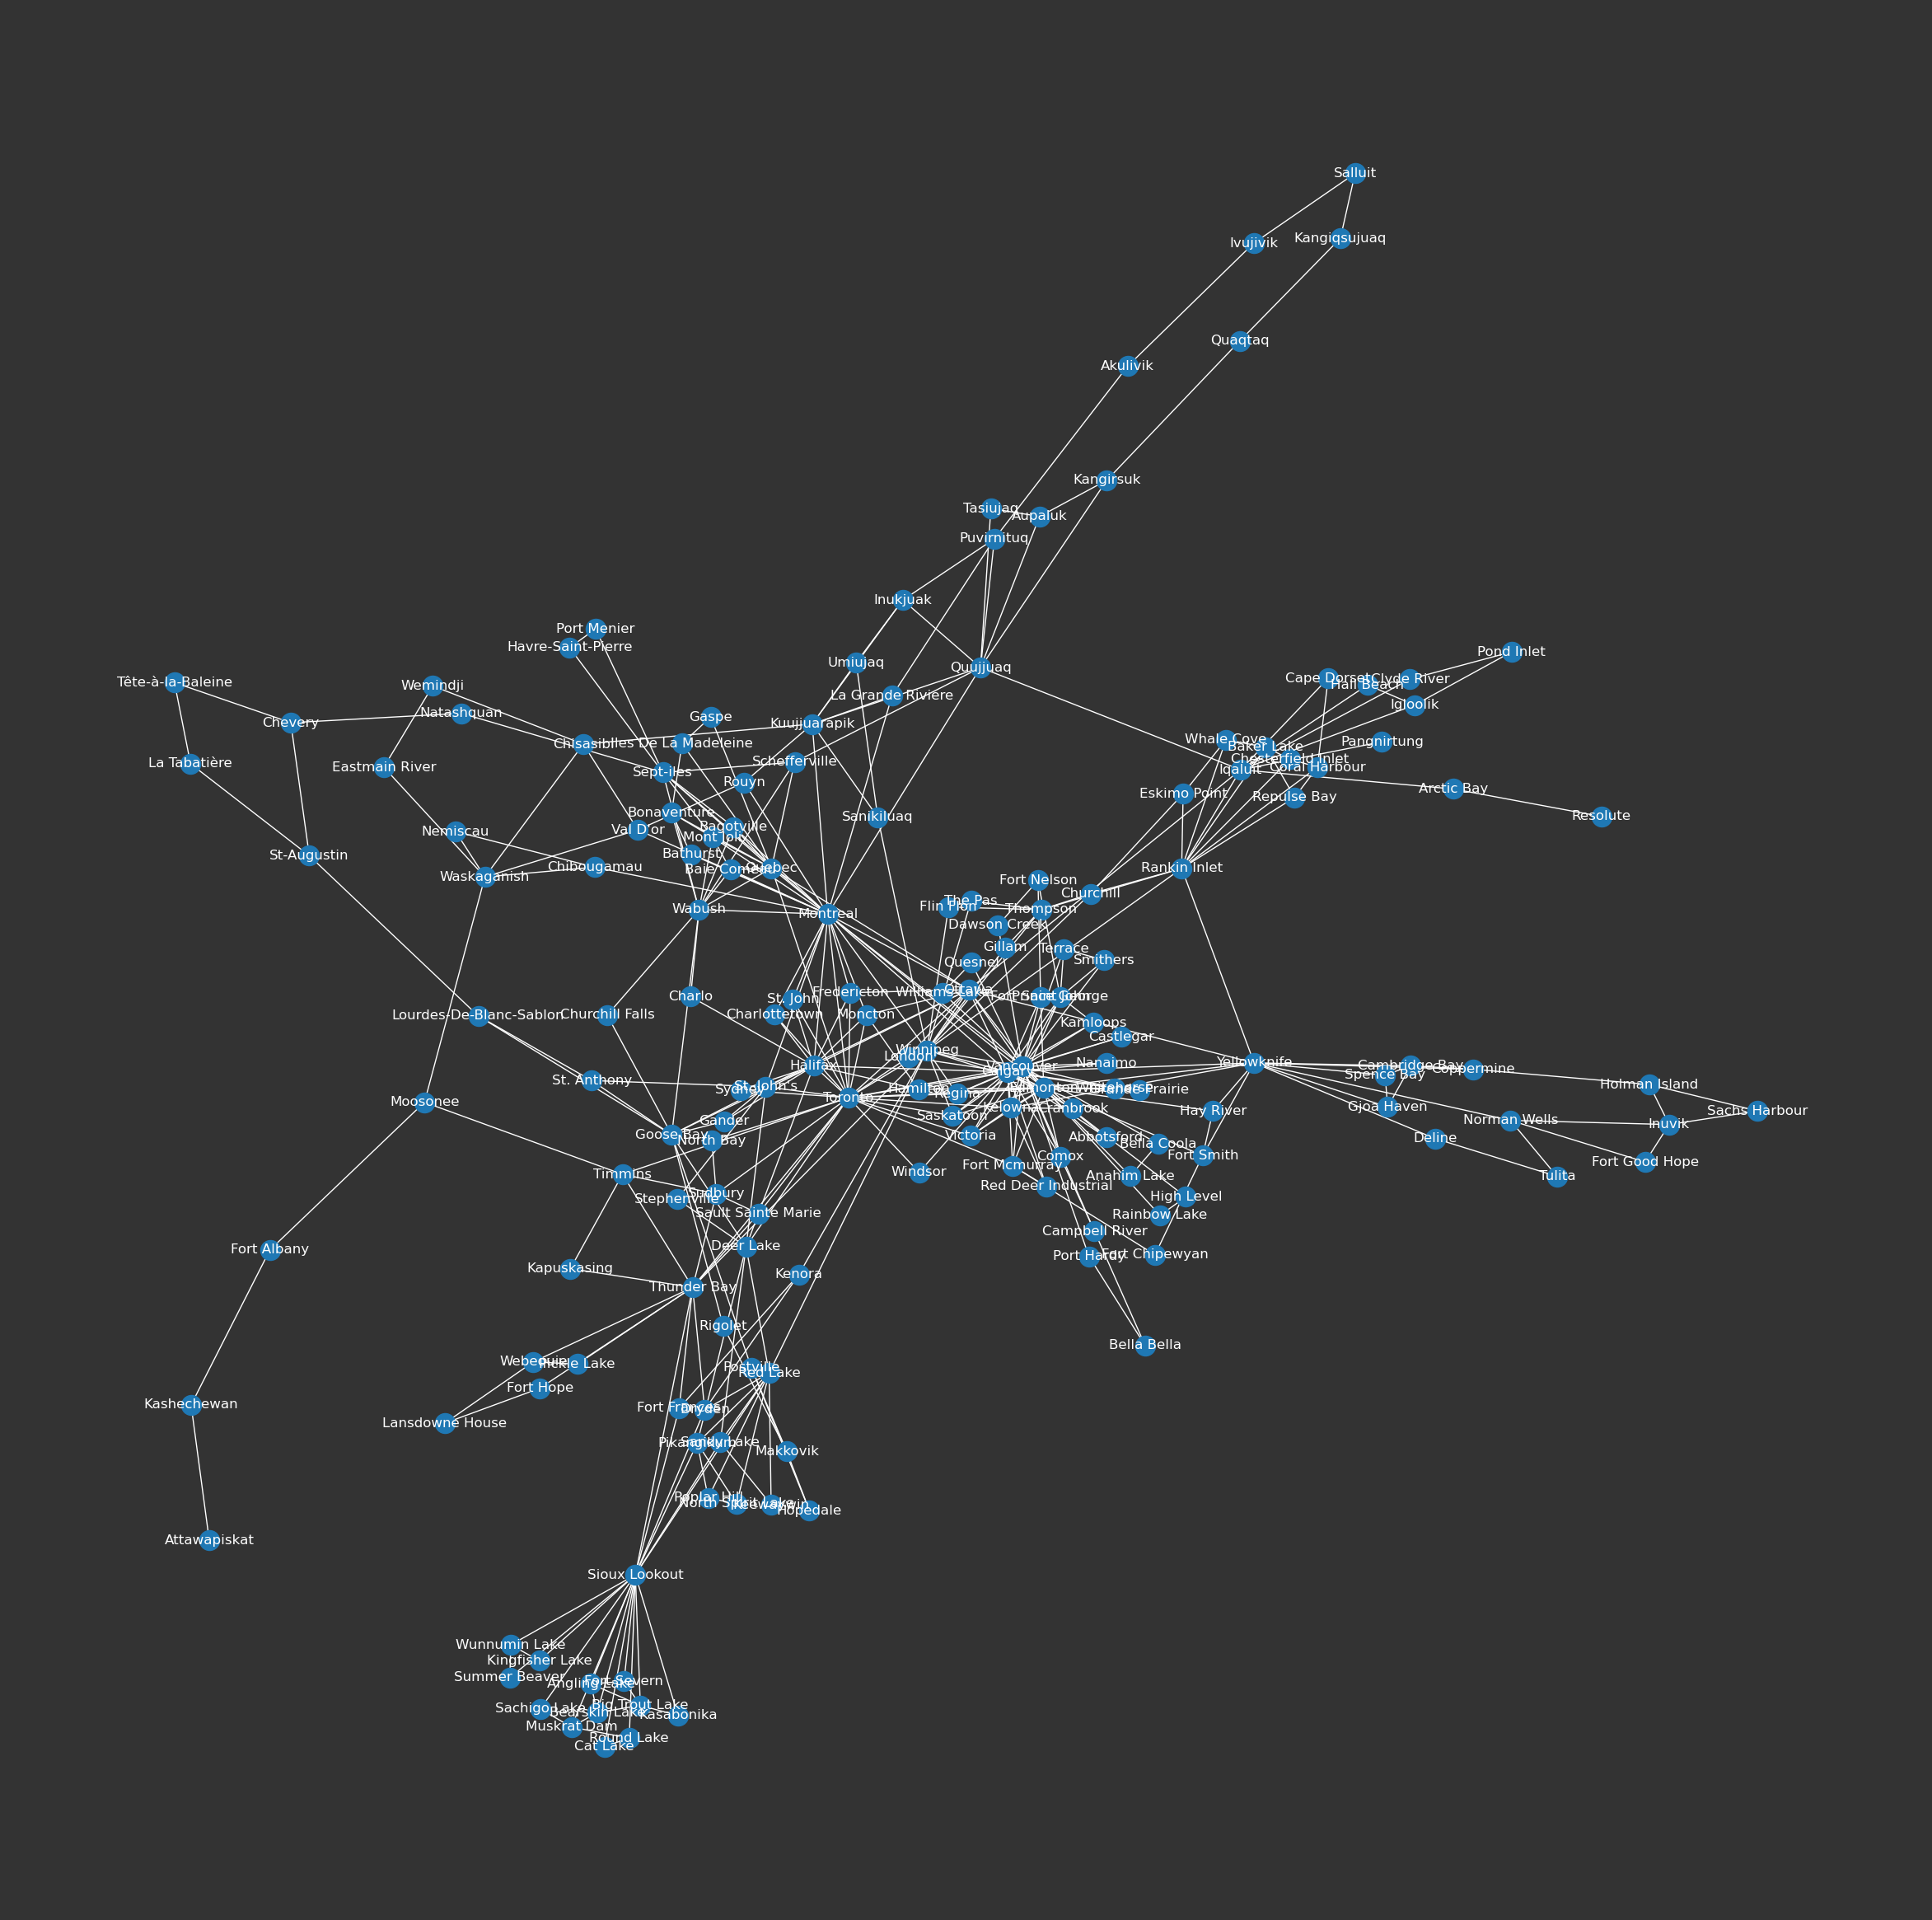

In [194]:
G = nx.read_edgelist("Canada_airport_network",
                     delimiter=",",
                     create_using=nx.Graph,
                     data=False)

pos = nx.spring_layout(G)
fig, ax = plt.subplots()
nx.draw(G, with_labels=True,
           edge_color='white',
           font_color='white')
fig.set_facecolor('#333333')
fig.set_size_inches((30,30))
plt.show()

('Vancouver', 28)
('Toronto', 27)
('Calgary', 27)
('Montreal', 25)
('Edmonton', 22)
('Winnipeg', 19)
('Sioux Lookout', 18)
('Halifax', 15)
('Ottawa', 14)
('Yellowknife', 13)


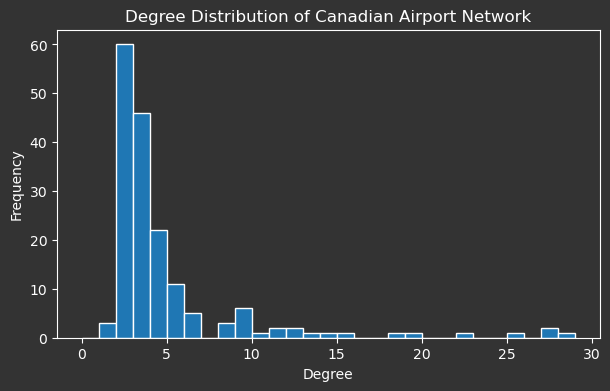

In [195]:
# CREATION OF HISTOGRAM
d = [degree for node,degree in G.degree()]
fig, ax = plt.subplots()
fig.set_facecolor('#333333')
fig.set_size_inches(7,4)
ax.set_facecolor('#333333')
ax.set_ylabel("Frequency", color='white')
ax.set_xlabel("Degree", color='white')
ax.set_title("Degree Distribution of Canadian Airport Network",
             color='white')
ax.set_xticks(range(0,31,5))
ax.tick_params(colors='white')
plt.setp(ax.spines.values(), color='white')
ax.hist(d, bins=range(0,max(d)+2), edgecolor='white')
#TEN HIGHEST DEGREE NODES
sorted_node_degrees = sorted(G.degree(),
                             key=lambda item: item[1],
                             reverse=True)
for i in range(10):
    print(sorted_node_degrees[i])
plt.show()

In [196]:
#TOP TEN CLOSENESS CENTRALITIES
closeness_centralities = list(nx.closeness_centrality(G).items())
sorted_closeness_centralities = sorted(closeness_centralities,
                                       key=lambda item: item[1],
                                       reverse=True)
top_ten = sorted_closeness_centralities[:10]
for i in range(10):
    print(top_ten[i])

('Toronto', 0.40669856459330145)
('Montreal', 0.4)
('Winnipeg', 0.3890160183066362)
('Calgary', 0.3881278538812785)
('Ottawa', 0.38724373576309795)
('Edmonton', 0.37527593818984545)
('Vancouver', 0.37199124726477023)
('Halifax', 0.35490605427974947)
("St. John's", 0.3420523138832998)
('Quebec', 0.3386454183266932)


In [197]:
#TOP TEN BETWEENNESS CENTRALITIES
betweenness_centralities = list(nx.betweenness_centrality(G).items())
sorted_betweenness_centralities = sorted(betweenness_centralities,
                                       key=lambda item: item[1],
                                       reverse=True)
top_ten = sorted_betweenness_centralities[:10]
for i in range(10):
    print(top_ten[i])

('Montreal', 0.29082665887369474)
('Winnipeg', 0.233389710780838)
('Toronto', 0.20220852349025703)
('Thunder Bay', 0.1541636772698015)
('Vancouver', 0.1476909979116367)
('Sioux Lookout', 0.13894203835380306)
('Yellowknife', 0.13396347623936597)
('Ottawa', 0.12343459094905944)
('Calgary', 0.11439352651468462)
('Iqaluit', 0.1026056055766285)


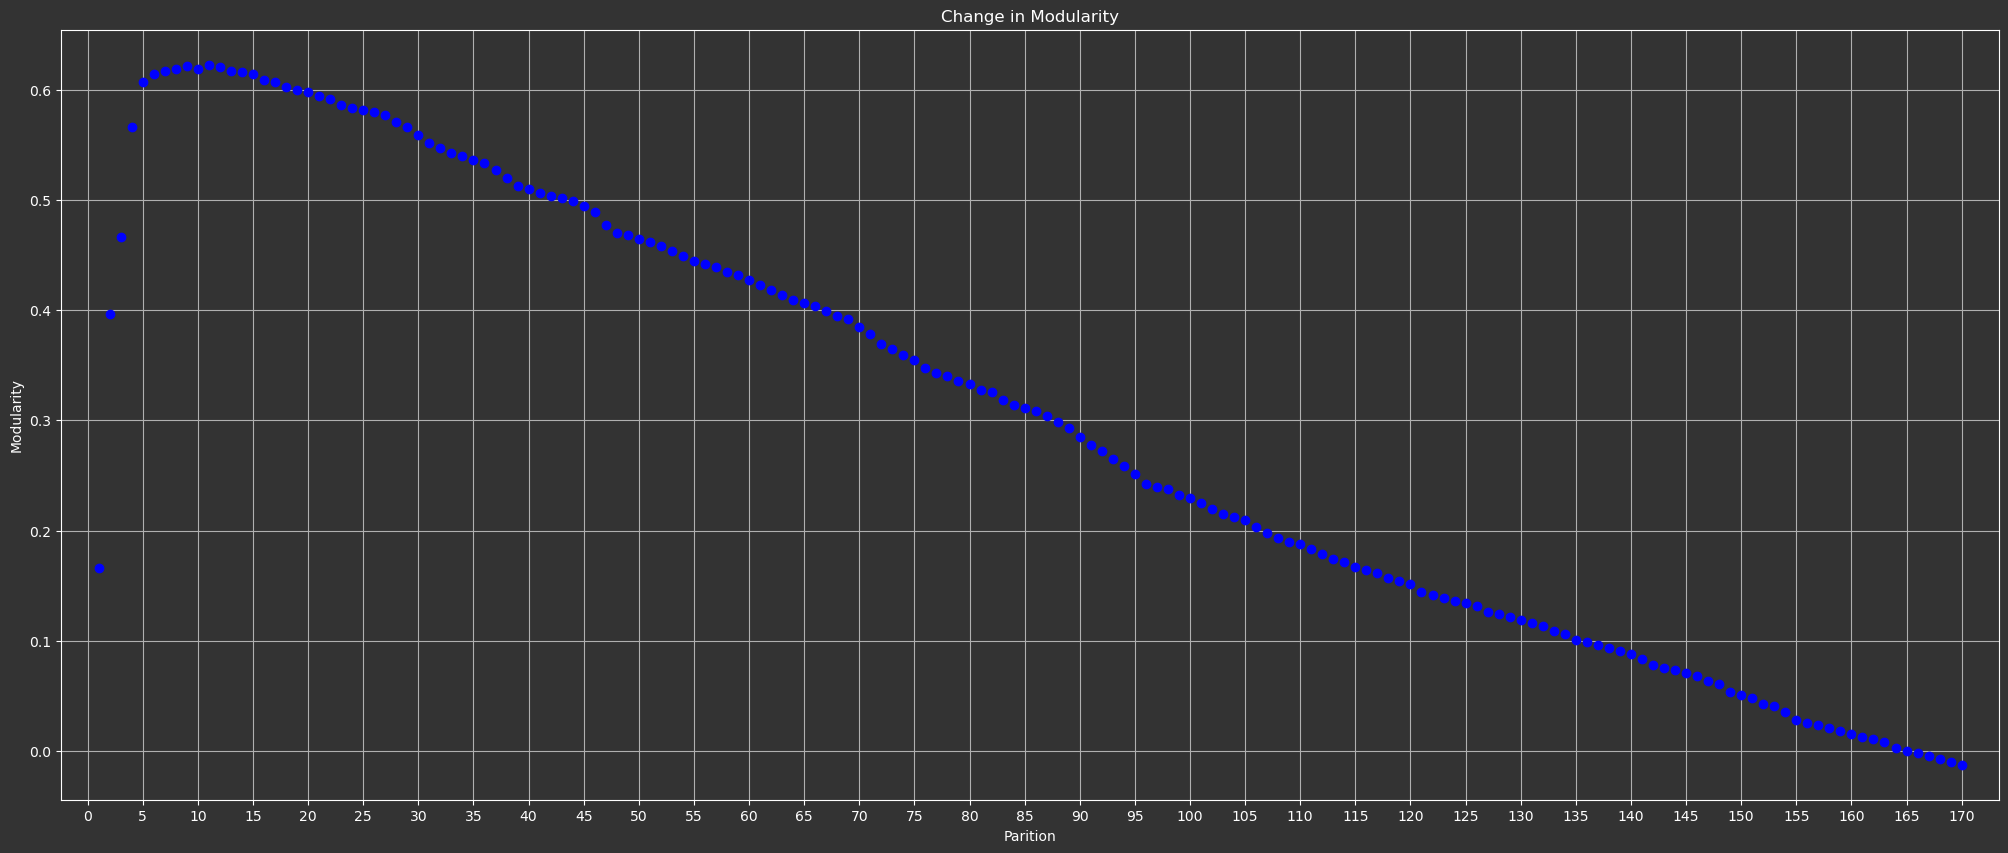

Maximum modularity = 0.6224924274630673 
Partition with Maximum Modularity = 10


In [198]:
communities_generator = nx.community.girvan_newman(G)
x=[]
mod=[]
partitions=[]
counter=0

for c in communities_generator:
    counter+=1
    x.append(counter)
    mod.append(nx.community.modularity(G,c))
    partitions.append(c)

fig, ax = plt.subplots()
fig.set_facecolor('#333333')
fig.set_size_inches(25,10)
ax.set_facecolor('#333333')
ax.set_ylabel("Modularity", color='white')
ax.set_xlabel("Parition", color='white')
ax.set_xticks(range(0,171,5))
ax.set_title("Change in Modularity", color='white')
ax.tick_params(colors='white')
plt.setp(ax.spines.values(), color='white')
ax.plot(x,mod,'bo')
ax.margins(x=0.02)
ax.grid()
plt.show()
print(f"Maximum modularity = {max(mod)}",
      f"\nPartition with Maximum Modularity = {mod.index(max(mod))}")

/tmp/ipykernel_6442/2262483923.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  fig,axes = community_plot(G, cm.get_cmap('Dark2'), partitions[10])
/home/syarnaq/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


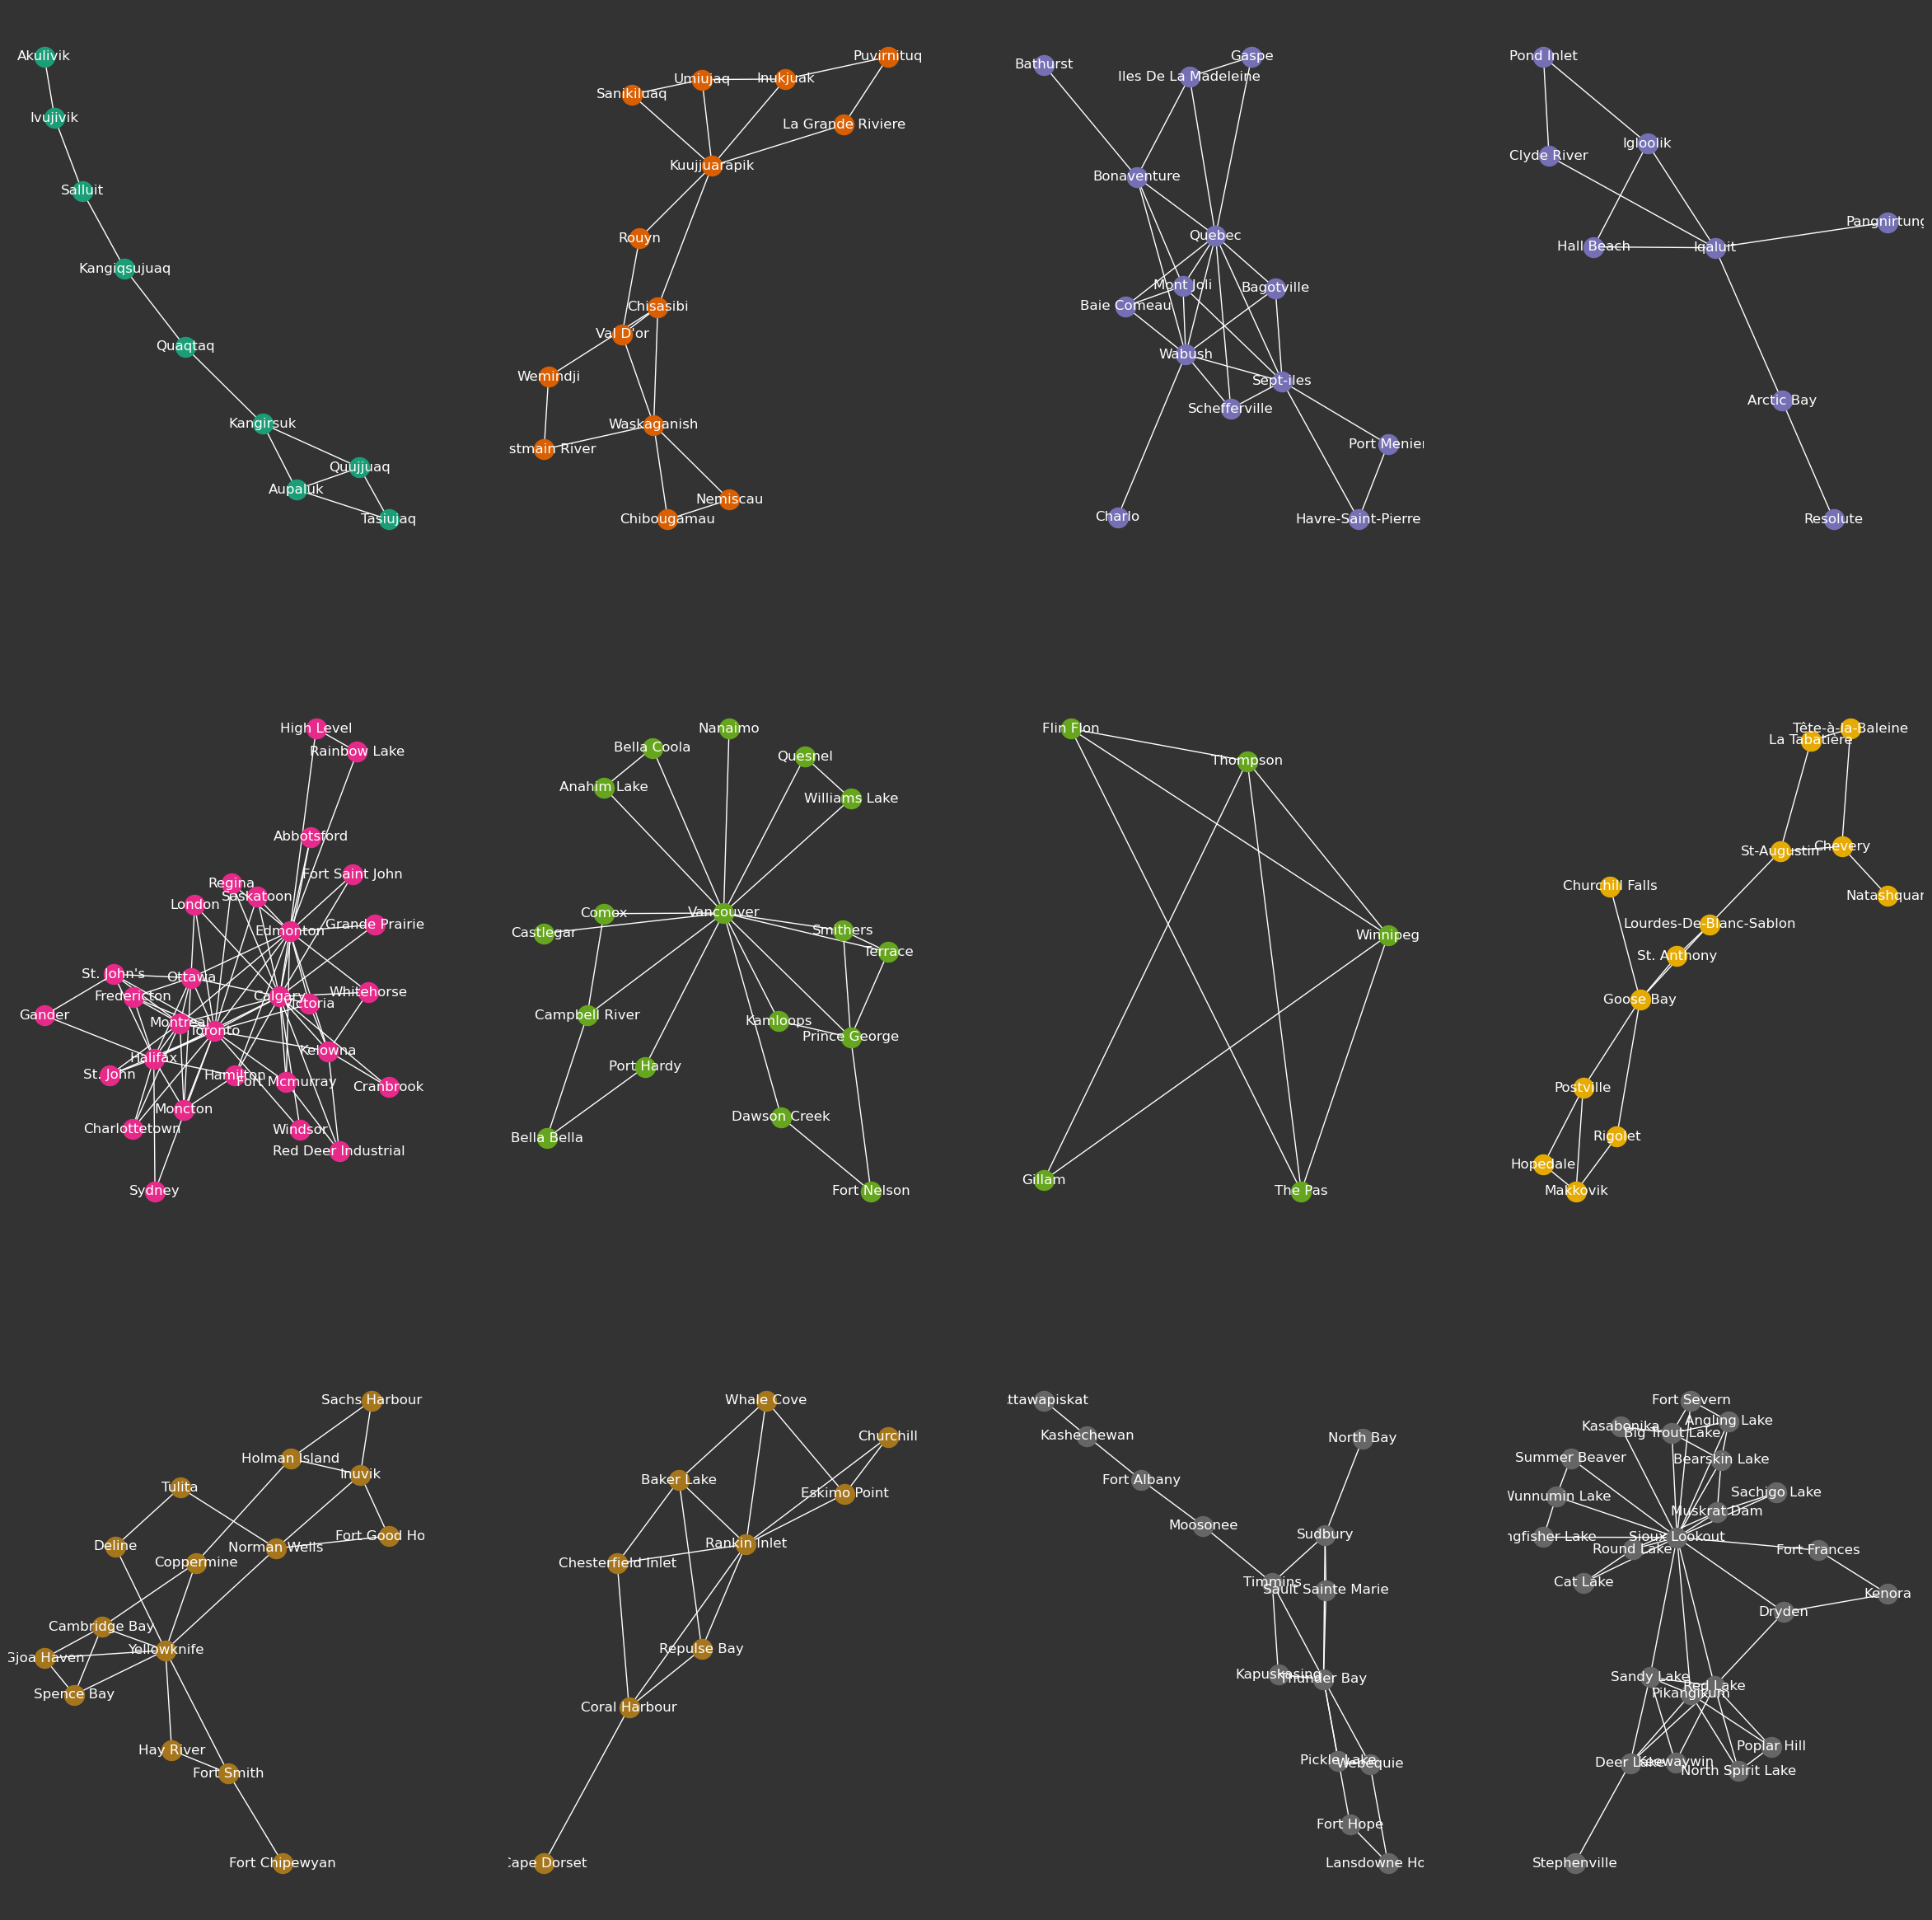

In [199]:
import matplotlib.cm as cm

def find_set(setlist, item):
    for s in setlist:
        if item in s:
            return s
        

def community_plot(G, cmap, partition):
    P = G.copy()
    for e in P.edges():
        if(find_set(partition, e[0]) != find_set(partition, e[1])):
            P.remove_edge(e[0],e[1])

    fig, axes = plt.subplots(3, 4)
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    
    for i, c in enumerate(nx.connected_components(P)):
        Ps = P.subgraph(c)
        pos = nx.spring_layout(Ps)
        color = cmap( (1+i) / len(partition))
        nx.draw(Ps, with_labels=True,
           pos=pos,
           node_color=color,
           edge_color='white',
           font_color='white',
           ax=axes[i])
        
        # Customizing axes spines for outline
        for spine in axes[i].spines.values():
            spine.set_visible(True)
            spine.set_color('white')  # Set the color of the outline
            spine.set_linewidth(2)    # Set the width of the outline
    
    return fig,axes
        

fig,axes = community_plot(G, cm.get_cmap('Dark2'), partitions[10])

fig.set_facecolor('#333333')
fig.set_size_inches((30,30))
plt.show()

## QUESTION 2

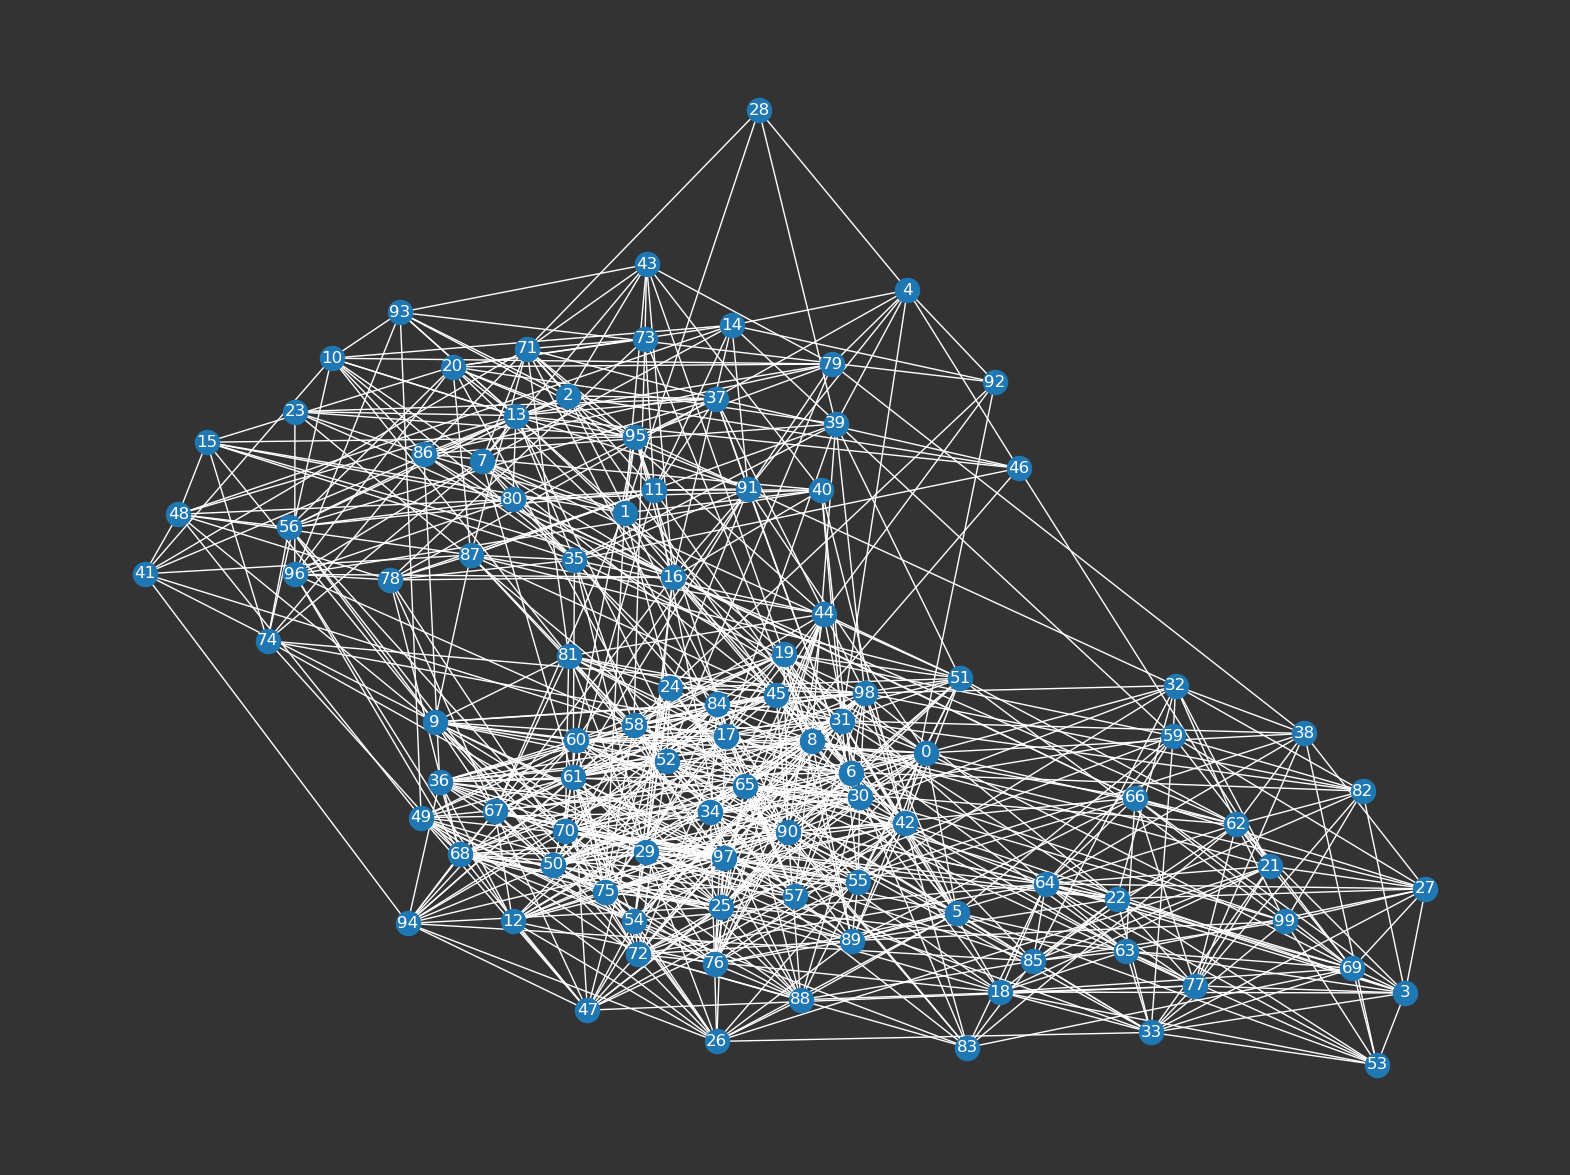

In [200]:
import pandas as pd

nodesdf = pd.read_csv('socialnetwork_attributes.csv')
edgesdf = pd.read_csv('socialnetwork_edges.csv')

A = nx.Graph()
for index, row in nodesdf.iterrows():
    A.add_node(row['node_id'], **row[1:].to_dict())

for index, row in edgesdf.iterrows():
    A.add_edge(row[0],row[1])
    
pos = nx.spring_layout(A)
fig, ax = plt.subplots()
nx.draw(A, with_labels=True,
           edge_color='white',
           font_color='white')
fig.set_facecolor('#333333')
fig.set_size_inches((20,15))
plt.show()

In [201]:
unique_ages = list(set([A.nodes[i]['age'] for i in A.nodes()]))
unique_int = list(set([A.nodes[i]['weekly internet usage'] for i in A.nodes()]))
unique_stream = list(set([A.nodes[i]['weekly streaming'] for i in A.nodes()]))

print("Attribute Names: age, weekly internet usage, weekly streaming\n")
print("Possible Values for Attributes:")
print("age = ", unique_ages)
print("weekly internet usage = ", unique_int)
print("weekly streaming = ", unique_stream)

Attribute Names: age, weekly internet usage, weekly streaming

Possible Values for Attributes:
age =  ['13-17', '18-25', '35+', '26-35']
weekly internet usage =  ['20+ hours', '0-10 hours', '10-20 hours']
weekly streaming =  ['medium', 'low', 'high']


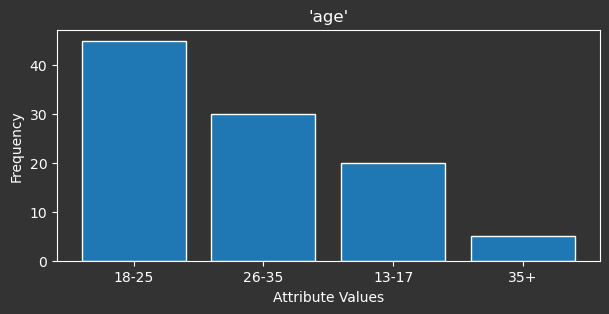

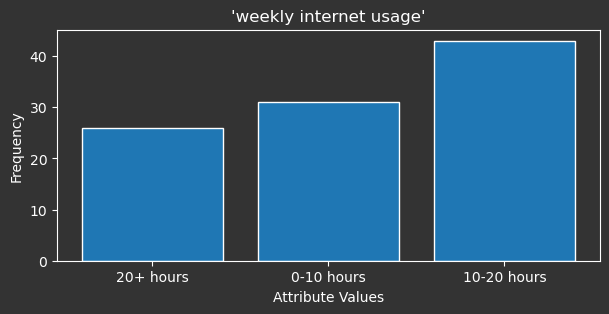

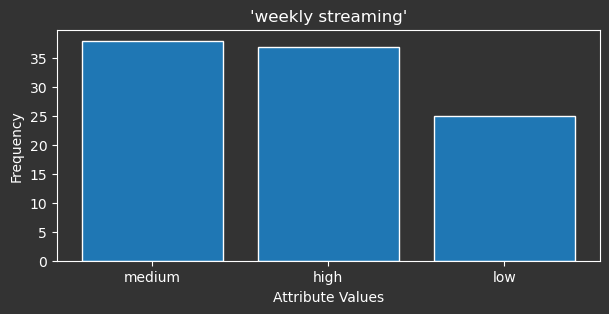

In [202]:
from collections import Counter

for atts in A.nodes[0].keys():
    hist = Counter([A.nodes[i][atts] for i in A.nodes()])
    fig,ax = plt.subplots()
    ax.bar(hist.keys(), hist.values(), edgecolor='white')
    ax.set_ylabel("Frequency", color='white')
    ax.set_xlabel("Attribute Values", color='white')
    ax.set_title(f"\'{atts}\'",
          color='white')
    ax.set_facecolor('#333333')
    ax.tick_params(colors='white')
    plt.setp(ax.spines.values(), color='white')
    fig.set_size_inches(7,3)
    fig.set_facecolor('#333333')
    plt.show()

In [203]:
def partition_nodes(A, attribute, unique_values):
    partition = []
    for unique_value in unique_values:
        s = [n for n in A.nodes() if A.nodes[n][attribute] == unique_value]
        partition.append(set(s))
    return partition

age_partition = partition_nodes(A, 'age', unique_ages)
int_partition = partition_nodes(A, 'weekly internet usage', unique_int)
stream_partition = partition_nodes(A, 'weekly streaming', unique_stream)

print("Modularities based on attribute value partitioning:\n")
print("\'age\' = ", nx.community.modularity(A,age_partition))
print("\'weekly internet usage\' = ", nx.community.modularity(A,int_partition))
print("\'weekly streaming\' = ", nx.community.modularity(A,stream_partition))

Modularities based on attribute value partitioning:

'age' =  0.33024624725923424
'weekly internet usage' =  0.03853600944510034
'weekly streaming' =  0.11829650868611909


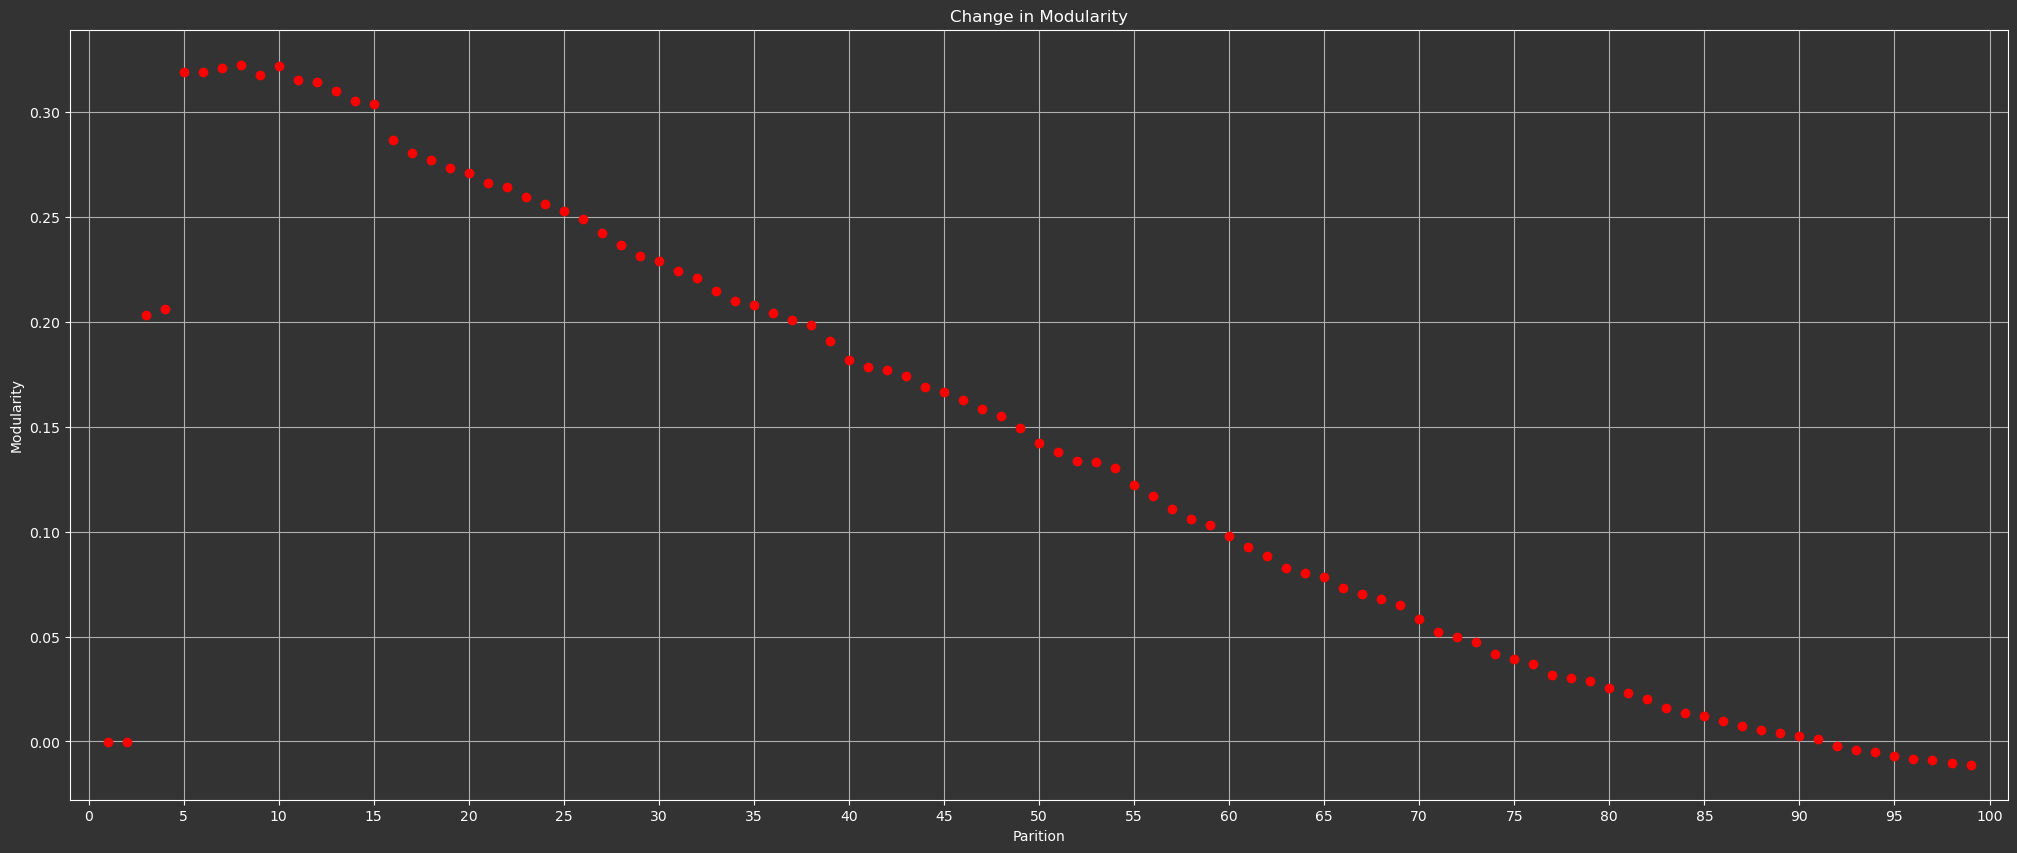

Maximum modularity = 0.32255776690841625 
Partition with Maximum Modularity = 7


In [204]:
communities_generator = nx.community.girvan_newman(A)
x=[]
mod=[]
partitions=[]
counter=0

for c in communities_generator:
    counter+=1
    x.append(counter)
    mod.append(nx.community.modularity(A,c))
    partitions.append(c)

fig, ax = plt.subplots()
fig.set_facecolor('#333333')
fig.set_size_inches(25,10)
ax.set_facecolor('#333333')
ax.set_ylabel("Modularity", color='white')
ax.set_xlabel("Parition", color='white')
ax.set_xticks(range(0,101,5))
ax.set_title("Change in Modularity", color='white')
ax.tick_params(colors='white')
plt.setp(ax.spines.values(), color='white')
ax.plot(x,mod,'ro')
ax.margins(x=0.02)
ax.grid()
plt.show()
print(f"Maximum modularity = {max(mod)}",
      f"\nPartition with Maximum Modularity = {mod.index(max(mod))}")

In [205]:
def strong_communities(G, partition):
    str_coms = []
    for c in partition:
        add = True
        for n in c:
            indeg = 0
            outdeg = 0
            for adj in G.neighbors(n):
                if find_set(partition, adj) == find_set(partition, n):
                    indeg+=1
                else:
                    outdeg+=1
            if outdeg >= indeg:
                add = False
        if add:
            str_coms.append(c)
    return str_coms

def weak_communities(G, partition):
    weak_coms = []
    for c in partition:
        insum = 0
        outsum = 0
        for n in c:
            for adj in G.neighbors(n):
                if find_set(partition, adj) == find_set(partition, n):
                    insum+=1
                else:
                    outsum+=1
        if insum > outsum:
                weak_coms.append(c)
    return weak_coms

print("Weak Communities:\n", weak_communities(A,stream_partition))
print()
print("Strong Communities:\n", strong_communities(A,stream_partition))        

Weak Communities:
 [{3, 16, 18, 21, 22, 27, 32, 38, 52, 53, 59, 62, 63, 64, 66, 69, 72, 77, 80, 81, 83, 84, 85, 88, 99}]

Strong Communities:
 []


## Question 3

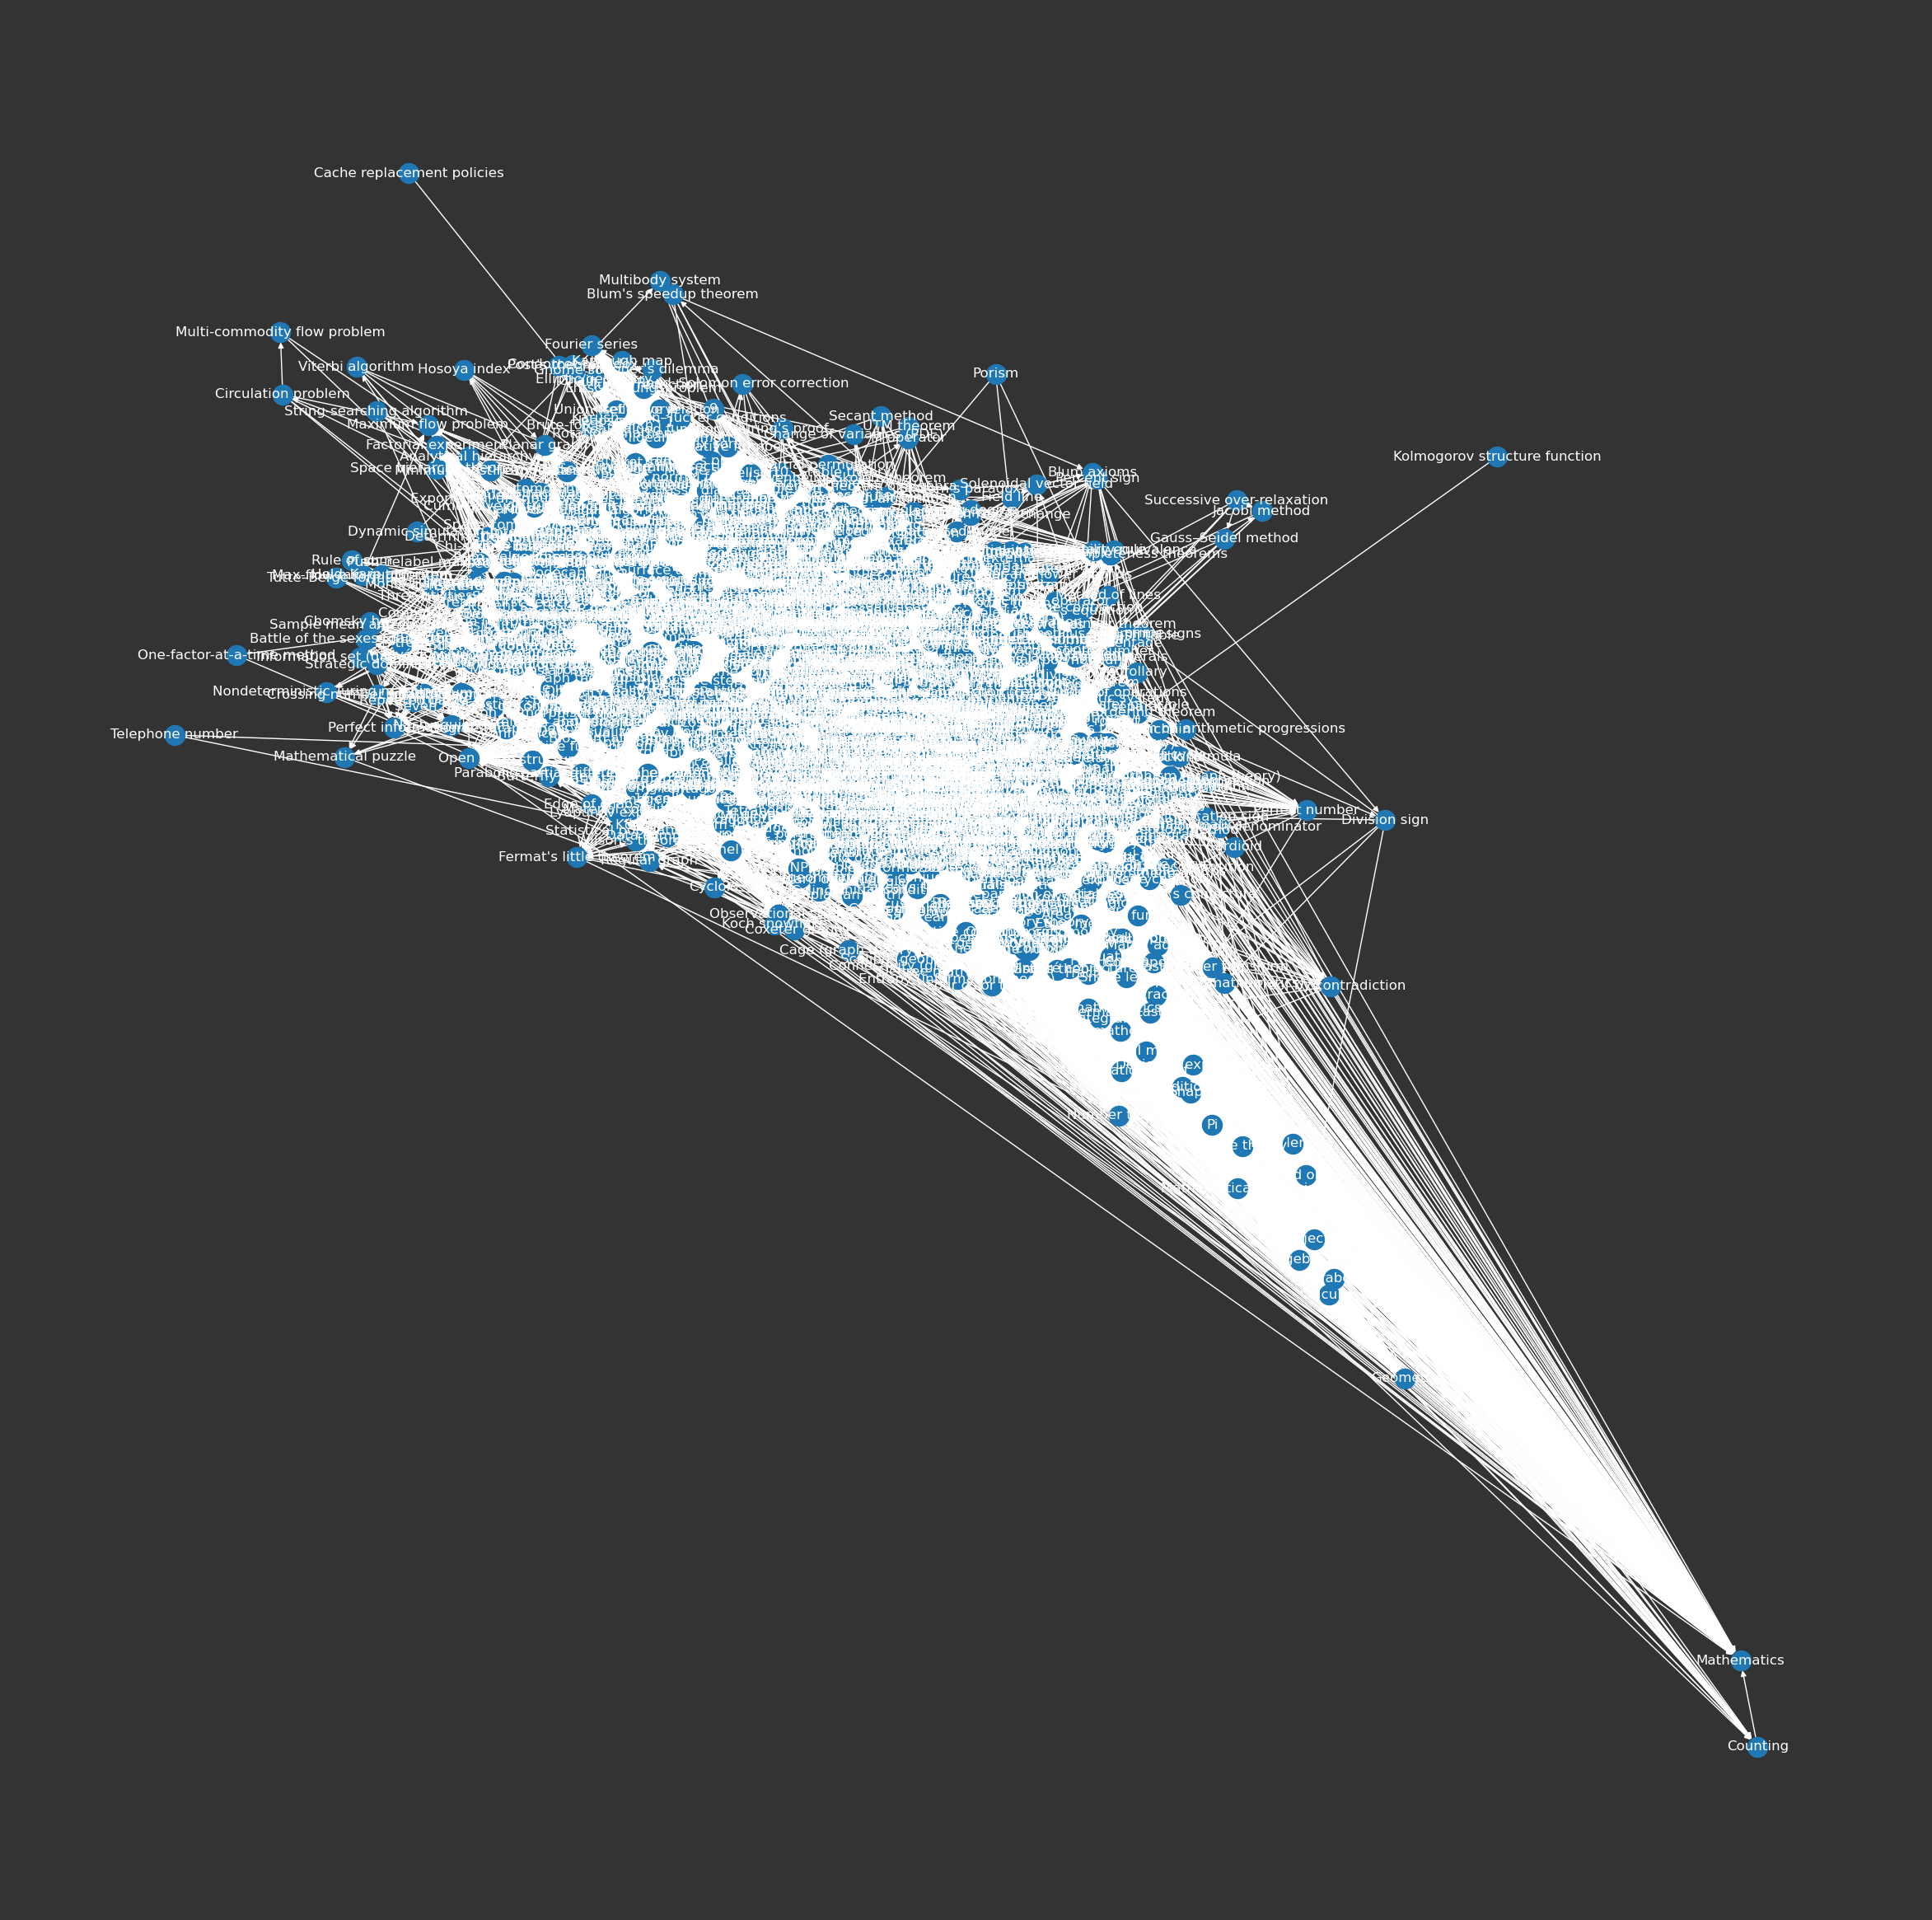

In [206]:
W = nx.read_edgelist("Wiki_math",
                     delimiter="\t",
                     create_using=nx.DiGraph,
                     data=False)
pos = nx.spring_layout(W)
fig, ax = plt.subplots()
nx.draw(W, with_labels=True,
           edge_color='white',
           font_color='white')
fig.set_facecolor('#333333')
fig.set_size_inches((30,30))
plt.show()

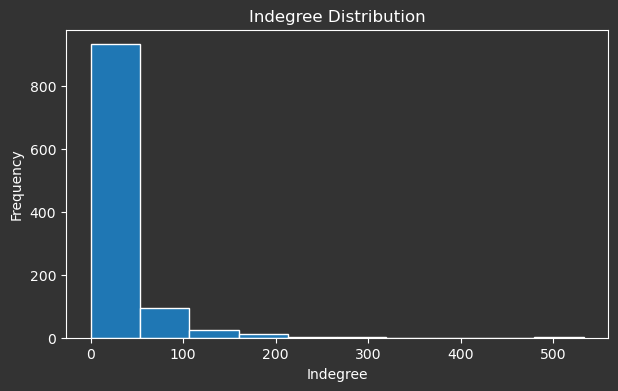

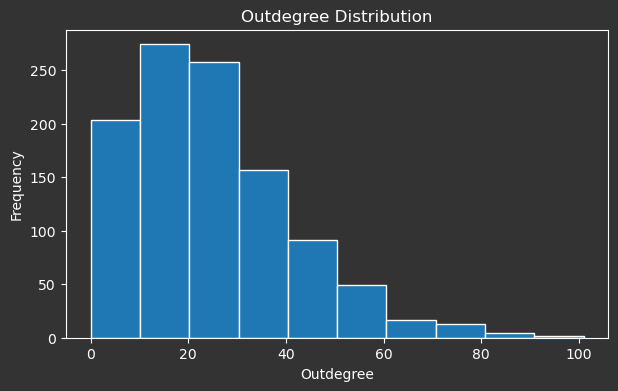

In [217]:
# Get the in-degrees and out-degrees
in_degrees = [deg for node, deg in W.in_degree()]
out_degrees = [deg for node, deg in W.out_degree()]

for x in [("Indegree",in_degrees),("Outdegree",out_degrees)]:
    fig,ax = plt.subplots()
    ax.hist(x[1], edgecolor='white')
    ax.set_ylabel("Frequency", color='white')
    ax.set_xlabel(x[0], color='white')
    ax.set_title(f"{x[0]} Distribution",
          color='white')
    ax.set_facecolor('#333333')
    ax.tick_params(colors='white')
    plt.setp(ax.spines.values(), color='white')
    fig.set_size_inches(7,4)
    fig.set_facecolor('#333333')
    plt.show()


In [219]:
# Convert the directed graph W to an undirected graph U
U = W.to_undirected()
# Now U is an undirected version of W

In [220]:
#TOP TEN BETWEENNESS CENTRALITIES
bc = list(nx.betweenness_centrality(U).items())
sorted_bc = sorted(bc, key=lambda item: item[1], reverse=True)
top_ten = sorted_bc[:10]
for i in range(10):
    print(top_ten[i])

('Mathematics', 0.14548605412675597)
('Function (mathematics)', 0.03574646072960819)
('Real number', 0.03318836559516409)
('Algorithm', 0.029452691330308346)
('Graph theory', 0.02602351259021627)
('Integer', 0.01894963376857839)
('Statistics', 0.014505511948628643)
('Geometry', 0.014149613729872383)
('Natural number', 0.01350134183089047)
('Complex number', 0.013226495300095413)


In [233]:
import community as community_louvain

# Compute the best partition using the Louvain method
partition = community_louvain.best_partition(U)

# Convert the partition to a list of communities
communities = {}
for node, community in partition.items():
    communities.setdefault(community, set()).add(node)

communities = list(communities.values())

modularity = nx.community.modularity(U,communities)

print("modularity = ", modularity)
print(communities[3])

modularity =  0.4514611545209169
